In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/ColabNotebooks/RSAFS.csv', encoding='windows-1251', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    302 non-null    object
 1   RSAFS   302 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [4]:
 from datetime import datetime
df['DATE'] = df['DATE'].apply(lambda x: datetime(int(x.split('-')[0]),int(x.split('-')[1]),int(x.split('-')[2])))
df

,DATE,RSAFS
0,1992-01-01,164083
1,1992-02-01,164260
2,1992-03-01,163747
3,1992-04-01,164759
4,1992-05-01,165617
...,...,...
297,2016-10-01,465321
298,2016-11-01,466028
299,2016-12-01,470616
300,2017-01-01,473614


In [5]:
# Добавление меток месяцев
#

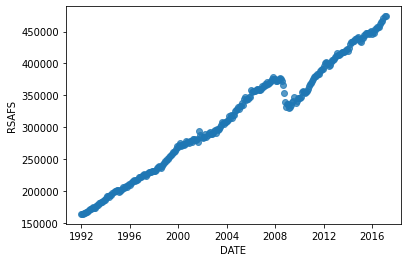

In [6]:
# График исходных данных

plt.scatter(df['DATE'],df['RSAFS'], alpha=0.75)

plt.xlabel('DATE')
plt.ylabel('RSAFS')
plt.show()

In [8]:
# Построение модели регрессии
from sklearn.linear_model import LinearRegression

df['DATE'] = df['DATE'].apply(lambda x: x.timestamp())

lr = LinearRegression()
X = df.iloc[:,:-1].values
y = df.iloc[:,1:].values

lr.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# X

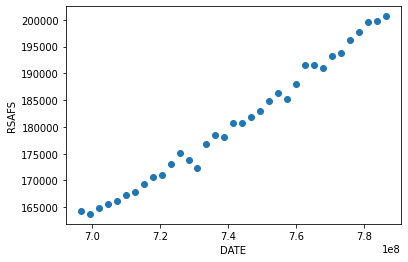

In [21]:
# Пример сезонности за 3 года.
plt.scatter(X[1:36], y[1:36]);

plt.xlabel('DATE')
plt.ylabel('RSAFS')
plt.show()

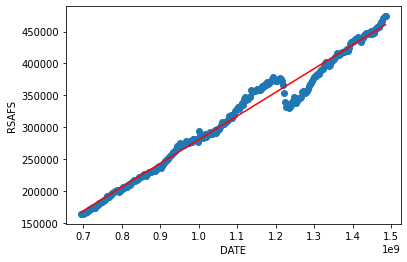

In [17]:
# Регрессия
y_lr = lr.predict(X)

plt.scatter(X, y);
plt.plot (X, y_lr, 'r');

plt.xlabel('DATE')
plt.ylabel('RSAFS')
plt.show()

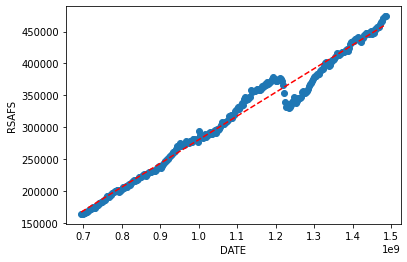

In [16]:
 # Линия тренда
 x = df['DATE']
 y = df['RSAFS']
 plt.scatter(x, y)

 z = np.polyfit(x, y, 1)
 p = np.poly1d(z)
 plt.plot(x,p(x),"r--")
 plt.xlabel('DATE')
 plt.ylabel('RSAFS')

 plt.show()

In [22]:
# Продление массива на 8 месяцев для создания предсказания
date_list = []
# 2017-02-01
for i in range(3, 9):
  date_list.append(datetime(2017,i,1).timestamp())
z = np.concatenate((X, np.array(date_list).reshape(-1,1)), axis=0)
date_list

[1488326400.0,
 1491004800.0,
 1493596800.0,
 1496275200.0,
 1498867200.0,
 1501545600.0]

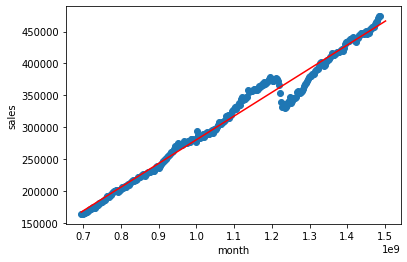

In [24]:
# Предсказание продаж
y_lr = lr.predict(z)

plt.scatter(X, y);
plt.plot (z, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('sales')

plt.show()

In [23]:
#Продажи на прогназируемый период
print(y_lr[-6:])

[[455819.56051906]
 [456782.42817018]
 [457777.39140968]
 [458740.2590608 ]
 [459735.22230029]
 [460730.18553978]]
